# Imports

In [ ]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Loading data

In [ ]:
!wget http://cb.lk/covid_19  
!unzip covid_19

--2022-12-08 10:45:47--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-12-08 10:45:48--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-12-08 10:45:48--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccb57f3

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '/content/CovidDataset/Train/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False)
       

test_set = test_datagen.flow_from_directory(
        '/content/CovidDataset/Val/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

# Model

In [ ]:
model=keras.Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4,4), padding="same", activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2))) 
model.add(Conv2D(256, (5, 5),strides=(1,1),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(Conv2D(384, (3, 3),strides=(1,1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding="same")) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu')) 
model.add(Dense(4096, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer="sgd", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
results=model.fit( train_set, epochs=50,validation_data=test_set,steps_per_epoch=7,validation_steps=2)


Epoch 1/50
7/7 [==============================] - 19s 1s/step - loss: 0.7033 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.7833
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 0.6979 - accuracy: 0.4955 - val_loss: 0.6873 - val_accuracy: 0.8500
Epoch 3/50
7/7 [==============================] - 7s 992ms/step - loss: 0.6947 - accuracy: 0.4911 - val_loss: 0.6854 - val_accuracy: 0.5333
Epoch 4/50
7/7 [==============================] - 7s 1000ms/step - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6855 - val_accuracy: 0.9000
Epoch 5/50
7/7 [==============================] - 7s 960ms/step - loss: 0.6925 - accuracy: 0.5491 - val_loss: 0.6829 - val_accuracy: 0.9667
Epoch 6/50
7/7 [==============================] - 7s 988ms/step - loss: 0.6907 - accuracy: 0.5536 - val_loss: 0.6796 - val_accuracy: 0.7833
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 0.6868 - accuracy: 0.5580 - val_loss: 0.6793 - val_accuracy: 0.9667
Epoch 8/50
7/7 [===========

In [ ]:
y_pred= (model.predict(test_set)>=0.5).astype(int)

2/2 [==============================] - 2s 460ms/step


In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Accuracy

In [ ]:
model.evaluate(train_set)

7/7 [==============================] - 5s 680ms/step - loss: 0.0263 - accuracy: 0.9955


[0.026298118755221367, 0.9955357313156128]

In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 2s 471ms/step - loss: 0.1963 - accuracy: 0.9500


[0.19631743431091309, 0.949999988079071]

In [ ]:
print(confusion_matrix(test_set.labels,y_pred))
print(accuracy_score(test_set.labels,y_pred)*100)


[[29  1]
 [ 2 28]]
95.0


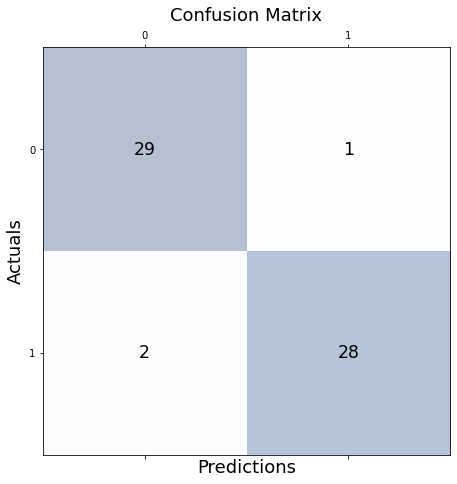

In [ ]:
conf_matrix = confusion_matrix(y_true=test_set.labels, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Text(0.5, 0, 'epoch')

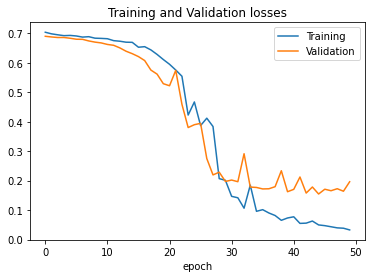

In [ ]:

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
#plt.ylim([0,1])

Text(0.5, 0, 'epoch')

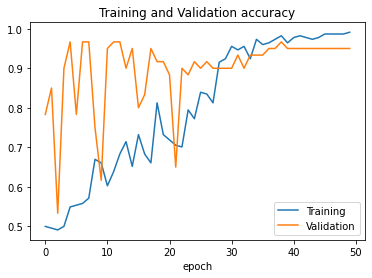

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
#plt.ylim([0,1])